In [1]:
from llm import *
read_name='../output/ppt/demo.pptx'
ppt=Prs.PPT(read_name)

# Demo

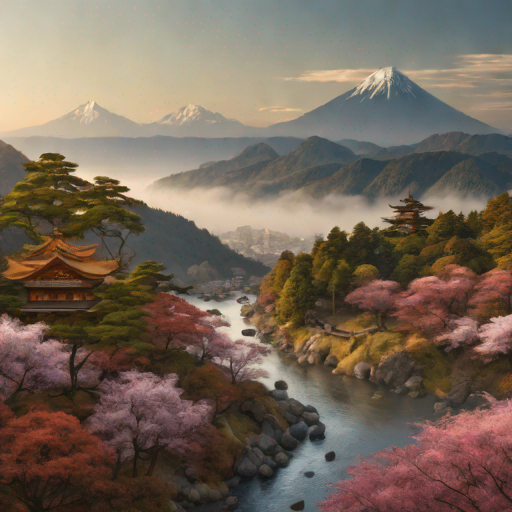

In [ ]:
# Stable Difussion

from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16", force_download=True, resume_download=True , low_cpu_mem_usage=True, offload_folder='', offload_state_dict=True )
# pipe.to("cuda")
pipe.enable_model_cpu_offload()

prompt = "high-res, 8k, photorealistic, beautiful, ultra high res, beautiful scenerary in Japan, mountains"

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

Image.open('../output/bg.png')

In [5]:
# PPT Generation
topic='vacation in japan.'
name='../output/ppt/test.pptx'
get_ppt(name=name,topic=topic,slides=5)
ppt=Prs.PPT(name); text=[]

Tokens Used: 388
	Prompt Tokens: 333
	Completion Tokens: 55
Successful Requests: 1
Total Cost (USD): $0.0006095
Tokens Used: 4810
	Prompt Tokens: 4453
	Completion Tokens: 357
Successful Requests: 9
Total Cost (USD): $0.0073935
Tokens Used: 1502
	Prompt Tokens: 1392
	Completion Tokens: 110
Successful Requests: 9
Total Cost (USD): $0.002308


In [ ]:
# Save results
for slide in ppt.prs.slides:
    ppt.add_img(slide,img=('../output/bg_transparent.png'),pos=[0,0],width=ppt.prs.slide_width,height=ppt.prs.slide_height)
ppt.prs_save(name=name)

In [3]:
# show results
import subprocess
subprocess.run(["start", name], shell=True, check=True)